
##  Audio data features analysis and visualization

**genres original** - The audio data is the popular GTZAN dataset taken from http://marsyas.info/downloads/datasets.html repository. This is a collection of 10 genres with 100 audio files each, all having a length of 30 seconds. 



Purpose:  **Feature Extraction**

We want to understand what is an Audio file? What features we can visualize on audio data and train on Machine learning models such as Genre Classification.

The first step in any  speech based system is to extract features i.e. identify the components of the audio signal that are good for identifying the linguistic content and discarding all the other stuff which carries information like background noise, emotion etc.

Some useful features of Audio data in Time domain and Frequency domain are:
1. Amplitude Envelope
2. Root-Mean Square Energy
3. Zero Crossing Rate
4. Spectorial Centroid 
5. Spectral spread
6. Spectral Roll-off
7. Band-Energy ratio
8. Mel-Frequency Cepstral Coefficients

Based upon our problem statement,we can select suitable features of Audio data for analysis and training such as Zero crossing rate, Amplitude Envelope , Spectorial Centroid are better for Music Genre Classifier machine learning model.

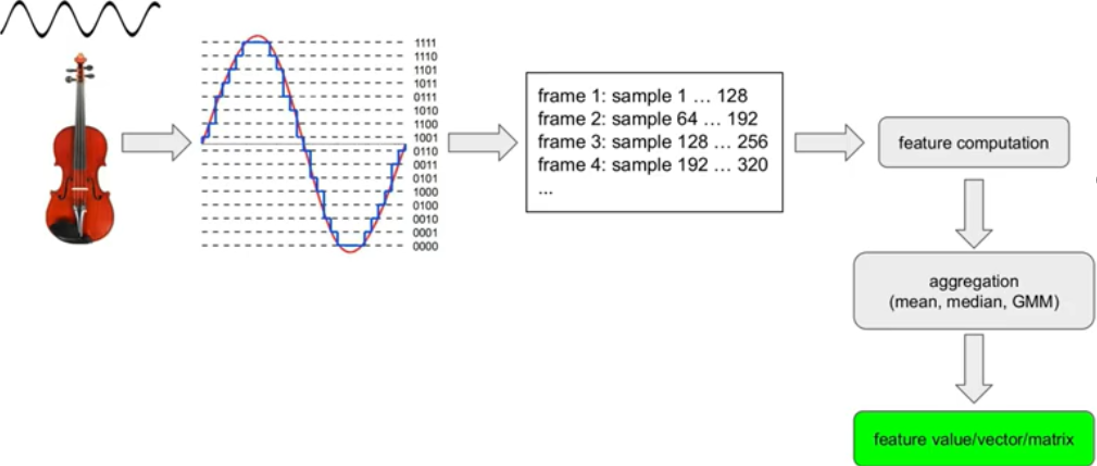
                                     
                                        Brief workflow of audio data processing                                      

In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = '../input/gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['hiphop', 'country', 'pop', 'reggae', 'jazz', 'blues', 'disco', 'rock', 'metal', 'classical']


**Understanding Audio file**


Audio File is available in .wav (waveformat) for 30 secs duration.It is initially represented as variation of pressure in air molecules in y-axis vs Time in x-axis

The sample rate (sr) is the number of samples of audio carried per second, measured in Hz or kHz. Sample rate (sr) is defined for the converting analog audio signal to digital form, this process is called sampling.


In [3]:
# Importing 1 audio file
audio_file, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('audio samples as an array:', audio_file, '\n')
print('audio_array shape:', np.shape(audio_file), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Total duration of the audio:', 661794/22050, 'secs')

audio samples as an array: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

audio_array shape: (661794,) 

Sample Rate (KHz): 22050 

Total duration of the audio: 30.013333333333332 secs


## Visualization of Audio 

2D representation of sound waves

Text(0, 0.5, 'air molecules pressure')

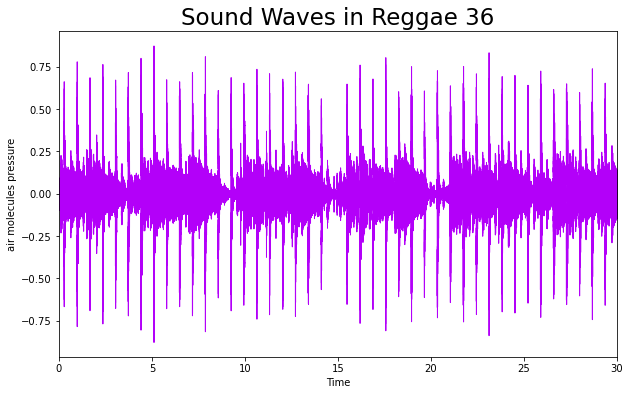

In [4]:
plt.figure(figsize = (10, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#B300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);
plt.ylabel("air molecules pressure")

### Fourier Transform

1. Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies

2. Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [5]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


Text(0, 0.5, 'magnitude')

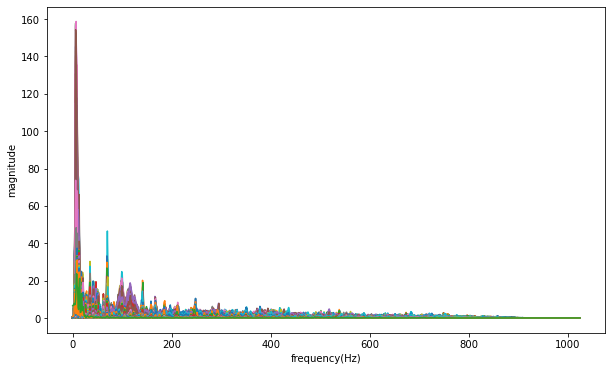

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(D);
plt.xlabel('frequency(Hz)')
plt.ylabel('magnitude')

### The Spectrogram

1. A spectrogram is a visual representation of frequencies of the signal wrt time. 
2. We then again convert the frequency axis to a logarithmic scale.

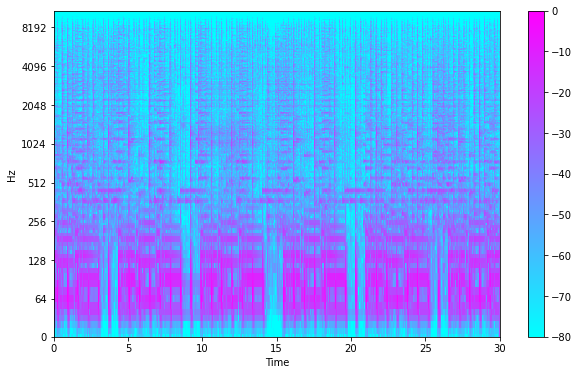

In [7]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (10, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

### Mel Spectrogram
The Mel Scale is the result of some non-linear transformation of the frequency scale.

The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis

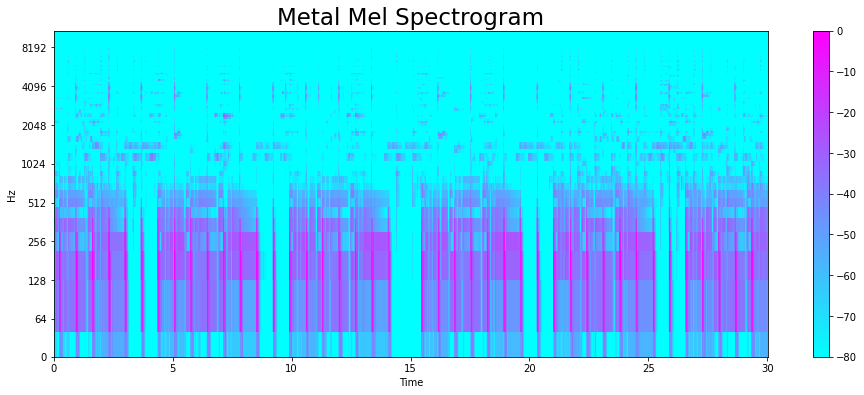

In [8]:
S = librosa.feature.melspectrogram(audio_file, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

## Audio Features

### Zero Crossing Rate


The rate at which the signal changes from positive to negative or back.


In other words, the rate at which the audio signal crosses the horizontal axis at zero in Time domain representation.


In [9]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


### Spectral Centroid

indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

We will find the spectral centroids per each frame in an audio signal,compute time for visualization, and then plot.


In [10]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1817.93364736 1953.08392985 2038.8113414  ...  766.50416352 1019.33192639
 1081.69931747] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


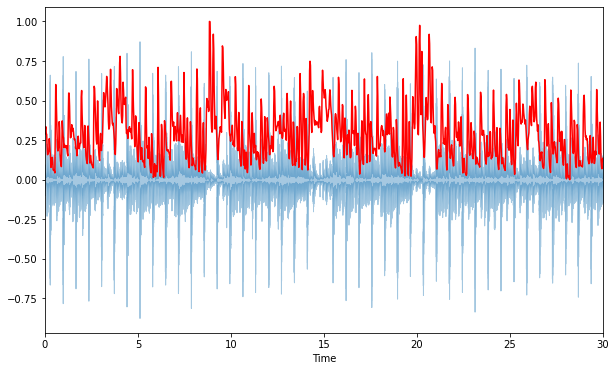

In [11]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (10, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4);
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral Rolloff

It is a measure of the shape of the signal.

The roll-off frequency is defined as the frequency under which some percentage (cutoff) of the total energy of the spectrum is contained.The rolloff frequency is computed for each frame in the signal.

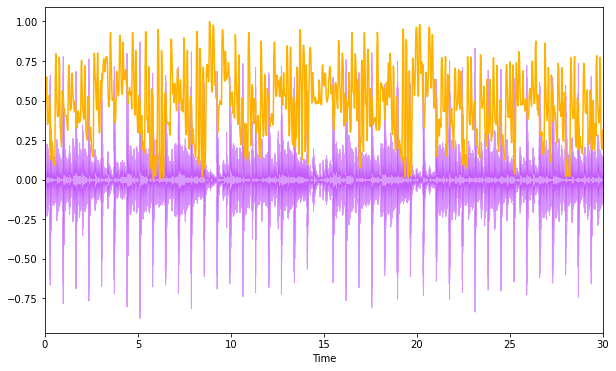

In [12]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (10, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

### Mel-Frequency Cepstral Coefficients:

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

Mel Frequency Cepstral Coefficents (MFCCs) are a feature widely used in automatic speech recognition, genre classification, recommendation system. Here we have computed 20 mfccs over 1293 frames

mfccs shape: (20, 1293)
[-236.6471       91.68791       1.8822868    45.477642      1.2787272
   32.267735      9.049938     19.613438     -5.055937     10.9652
   -4.000939      7.524836     -0.33692762    5.8053417    -1.8212872
    5.3813777     0.2863421     5.01483      -0.33473858   -0.85582525]
[5501.9175    704.6753    606.5872    194.97842   265.1021    228.13916
  295.59717   198.17844   111.908035  159.12578    89.309006  102.18719
  112.294495   76.561066   77.44251    69.86142    82.49723    57.18903
   74.21837    63.519684]


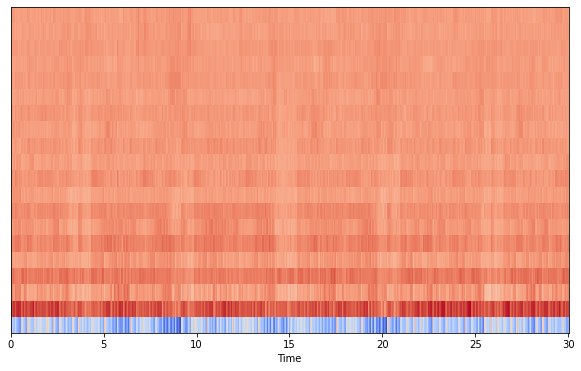

In [13]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

#Displaying  the MFCCs:
plt.figure(figsize = (10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

Mean: -3.097782e-09 

Var: 1.0000001


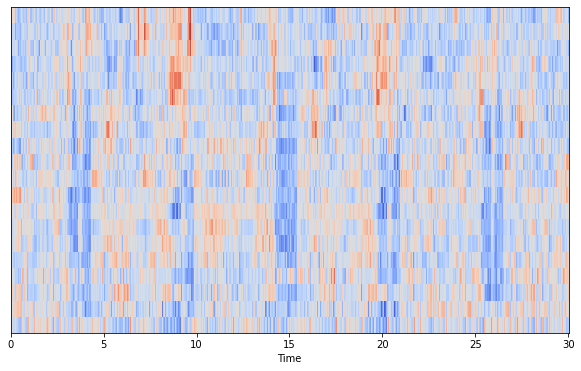

In [14]:
#Performing feature scaling in mfccs 
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm');

### Chroma frequencies
The term chroma feature relates to the twelve different pitch classes. Chroma-based featurescan be used to categorize music with meaningful pitches (usually into 12 scales) and whose tuning can equated to the equal-tempered scale.

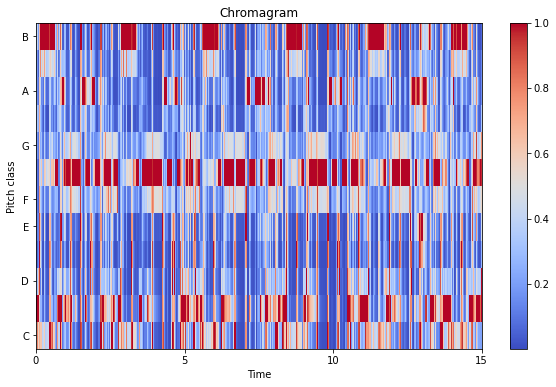

In [15]:
S = np.abs(librosa.stft(audio_file))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
S = np.abs(librosa.stft(audio_file, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax, cmap='coolwarm')
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')
plt.show()